In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Distribution plot
def DistrbutionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName)

    plt.title(Title)
    plt.xlabel('Stock Index Price')
    plt.ylabel('Proportion')
    plt.legend()

In [3]:
# Traning data
# Testing data
# lr: linear regression object
# poly_transform: polinomial transformation object
def PolyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    plt.figure(figsize=(12, 10))
    
    xmax = max([x_train.values.max(), x_test.values.max()])
    xmin = max([x_train.values.min(), x_test.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(y_test, y_test, 'go', label='Testing Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([0, 2000])
    plt.ylabel('Stock Index Price')
    plt.legend()

## Đọc dữ liệu, tiền xử lý, tổng quan ban đầu về dữ liệu

In [4]:
data = pd.read_excel('data/economy.xlsx')

In [5]:
data.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     int64  
 1   Month              24 non-null     int64  
 2   Interest_Rate      24 non-null     float64
 3   Unemployment_Rate  24 non-null     float64
 4   Stock_Index_Price  24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [7]:
data.describe()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


#### không có dữ liệu null

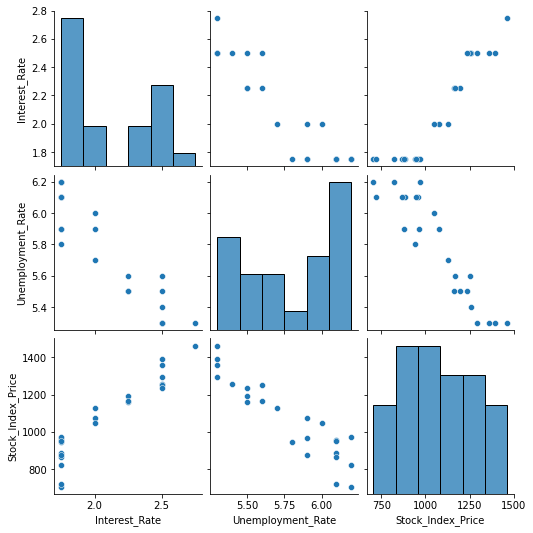

In [8]:
sns.pairplot(data[['Interest_Rate', 'Unemployment_Rate', 'Stock_Index_Price']])
plt.show()

#### Nhận xét: Stock Index Price gần như tương quan thuận với Interest Rate
#### và gần như tương quan nghịch với Unemployment Rate

# Singel Variable

## Simple Linear Regression

### Training & Testing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
y = data.Stock_Index_Price
X = data[['Interest_Rate']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
print('number of testing sample:', X_test.shape[0])
print('number of training sample:', X_train.shape[0])

number of testing sample: 5
number of training sample: 19


In [13]:
lre = LinearRegression()

In [15]:
lre.fit(X_train, y_train)

LinearRegression()

In [16]:
lre.fit(X_test, y_test)

LinearRegression()

In [17]:
# R^2 with training data
lre.score(X_train, y_train)

0.8447558861219844

In [18]:
# R^2 with tesing data
lre.score(X_test, y_test)

0.9516200143373036

In [19]:
# R^2 with dataset
lre.score(X, y)

0.8630132411519196

#### Có sự chênh lệch score ~0.1 giữa training dataset và tesing dataset
#### Với cả dataset: có thể nói rằng ~ 86.63% variation của Stock Index Price 
#### được giải thích bằng simple linear model này.

In [20]:
yhat_LR = lre.predict(X)

In [21]:
df_compare_LR = pd.DataFrame({'Actual': y.values, 'Predicted': yhat_LR})
df_compare_LR.head()

,Actual,Predicted
0,1464,1418.333333
1,1394,1293.000000
2,1357,1293.000000
3,1293,1293.000000
4,1256,1293.000000


### Overfitting, Underfitting & Model Selection

In [22]:
yhat_train = lre.predict(X_train)

In [23]:
yhat_test = lre.predict(X_test)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

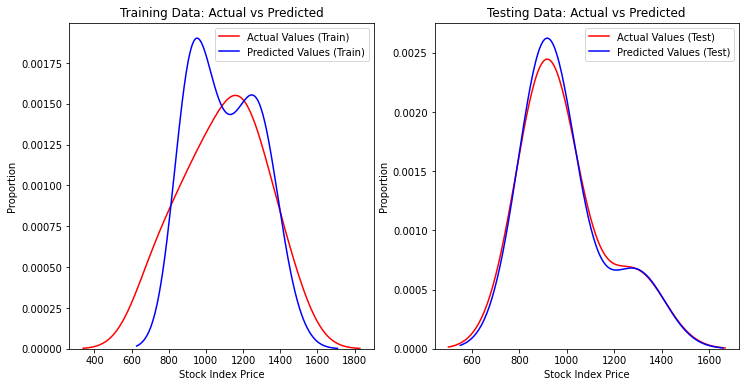

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
title = 'Training Data: Actual vs Predicted'
DistrbutionPlot(y_train, yhat_train, 'Actual Values (Train)', 'Predicted Values (Train)', title)
plt.subplot(1, 2, 2)
title = 'Testing Data: Actual vs Predicted'
DistrbutionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', title)
plt.show()

In [25]:
y_train_mean = y_train.mean()
yhat_train_mean = yhat_train.mean()
display(y_train_mean, yhat_train_mean)

1090.578947368421

1101.701754385965

In [26]:
y_train_std = y_train.std()
yhat_train_std = yhat_train.std()
display(y_train_std, yhat_train_std)

219.12130475795917

169.4669280553715

In [27]:
y_test_mean = y_test.mean()
yhat_test_mean = yhat_test.mean()
display(y_test_mean, yhat_test_mean)

992.2

992.2

In [28]:
y_test_std = y_test.std()
yhat_test_std = yhat_test.std()
display(y_test_std, yhat_test_std)

172.3737218951891

150.39999999999995

#### Với kết quả ta thấy:
* Training data: thì trung bình dự đoán bằng thực tế, độ lệch chuẩn của dự đoán thấp hơn thực tế, do đó phân phối ở dự đoán có hình vẽ cao hơn thực tế.
* Testing data: thì trung bình dự đoán lớn hơn thực tế, độ lệch chuẩn của dự đoán thấp hơn thực tế, do đó phân phối ở dự đoán có hình vẽ thấp hơn thực tế.
* So sánh Hình 1 và Hình 2, chúng ta thấy là sư phân phối dữ liệu thử nghiệm ở hình 1 tốt hơn trong việc fit dữ liệu.
* Sự khác biệt trong Hình 2 rất rõ ràng để nhận biết

### Cross validation

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
Rcross = cross_val_score(lre, X, y, cv=4)
Rcross

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\scipy\linalg\basic.py", line 1223, in lstsq
    raise ValueError('illegal value in %d-th argument of internal %s'
ValueError: illegal value in 4-th argument of internal None

  warnings.warn("Estimator fit failed. The score on this train-test"


array([        nan, -0.41018072, -9.10622679, -3.82769559])

In [31]:
print('The mean of the folds are', Rcross.mean(), ' and the standard deviation is', Rcross.std())

The mean of the folds are nan  and the standard deviation is nan


In [32]:
-1 * cross_val_score(lre, X, y, cv=4, scoring='neg_mean_squared_error')

array([ 2695.48263889,  3496.30806753, 12196.25064078, 26237.58682948])

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
yhat = cross_val_predict(lre, X, y, cv=4)
yhat[0:5]

array([1443.83333333, 1305.08333333, 1305.08333333, 1305.08333333,
       1305.08333333])

In [35]:
df_compare = pd.DataFrame({'Actual': y.values, 'Predicted': yhat})
df_compare.head()

,Actual,Predicted
0,1464,1443.833333
1,1394,1305.083333
2,1357,1305.083333
3,1293,1305.083333
4,1256,1305.083333


### Áp dụng Polinomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

#### Sử dụng 45% dataset làm testing data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=10)

In [38]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=3)

In [39]:
X_train.shape, X_train_pr.shape

((13, 1), (13, 4))

In [40]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)

LinearRegression()

In [41]:
yhat = poly.predict(X_test_pr)
yhat[0:5]

array([1237.16556291, 1237.16556291, 1174.75165563, 1237.16556291,
       1114.33112583])

In [42]:
df_compare_pr = pd.DataFrame({'Actual': y_test.values, 'Predicted': yhat})
df_compare_pr.head()

,Actual,Predicted
0,1254,1237.165563
1,1394,1237.165563
2,1195,1174.751656
3,1357,1237.165563
4,1075,1114.331126


In [43]:
yhat_test_pr = poly.predict(X_test_pr)
yhat_train_pr = poly.predict(X_train_pr)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

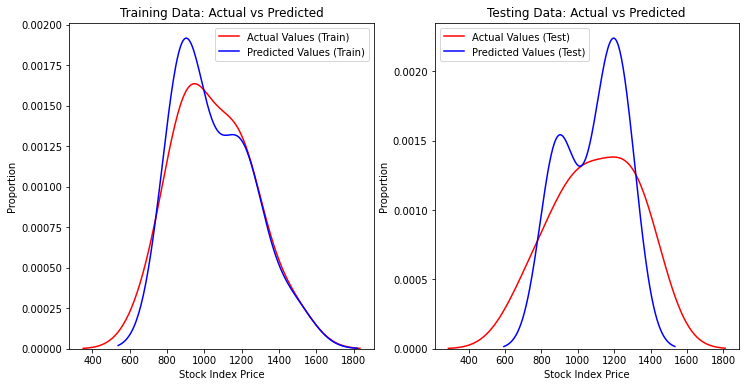

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
title = 'Training Data: Actual vs Predicted'
DistrbutionPlot(y_train, yhat_train_pr, 'Actual Values (Train)', 'Predicted Values (Train)', title)
plt.subplot(1, 2, 2)
title = 'Testing Data: Actual vs Predicted'
DistrbutionPlot(y_test, yhat_test_pr, 'Actual Values (Test)', 'Predicted Values (Test)', title)
plt.show()

#### Quan sát hình ta thấy training dataset fit hơn testing dataset
#### Tuy nhiên, kết quả vói Polynomial ổn hơn ở testing dataset so với Linear Regression

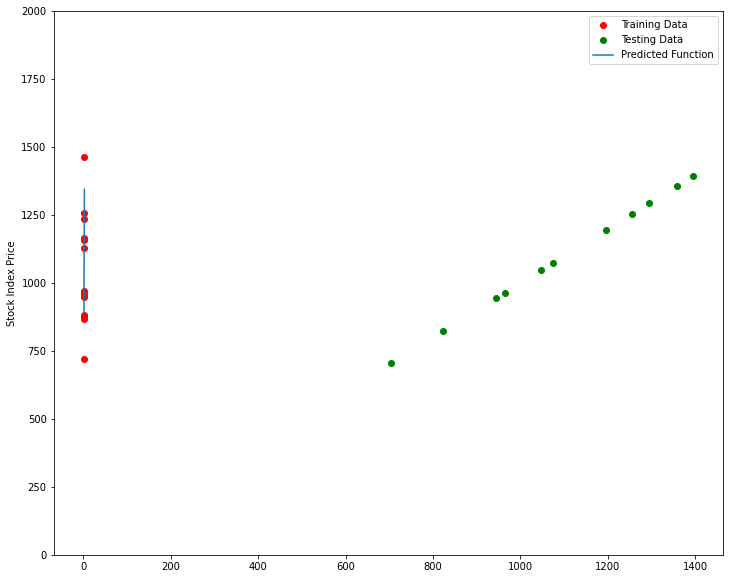

In [45]:
PolyPlot(X_train, X_test, y_train, y_test, poly, pr)

In [46]:
# R^2 of the training data
poly.score(X_train_pr, y_train)

0.9097571313861808

In [47]:
# R^2 of the testing data
poly.score(X_test_pr, y_test)

0.8082302055847905

In [48]:
# R^2 of the dataset
X_pr = pr.fit_transform(X)
poly.score(X_pr, y)

0.8609416165445758

#### Với cả dataset có thể nói rằng ~ 86.09% variation của Stock Index Price
#### được giải thích bằng polinomial linear model này

In [60]:
Rsqu_test = []
order = [1, 2, 3, 4, 5]
lst = [0, 0]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(X_train)
    x_test_pr = pr.fit_transform(X_test)
    lre.fit(X_train_pr, y_train)
    score = lre.score(x_test_pr, y_test)
    Rsqu_test.append(score)
    if score > lst[1]:
        lst = [n, score]
    print(n , lre.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(lst[0], lst[1], 'Maximum R^2')

LinAlgError: SVD did not converge in Linear Least Squares

#### Như vậy với order = 3 thì R^2 lớn nhất => Chọn mô hình linear regression vói polinomial có degree = 3

In [57]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order) 
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PolyPlot(x_train, x_test, y_train, y_test, poly, pr)

In [58]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [59]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.1))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>